<a href="https://colab.research.google.com/github/sadavarterohit/EIBEC3-Diffusion/blob/main/CTGAN_Philly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas sdv openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/city_payments_sector_label_fy2017.csv", header=0)

# Drop the 'ID' column if present
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

print(data.shape)
data.head()


(238894, 18)


,Unnamed: 0,fy,fm,check_date,document_no,dept,department_title,char_,character_title,sub_obj,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount,sector
0,0,2017,10,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,231,OVERTIME MEALS 0231,EAT AT JOE'S,PVXX,payment voucher,NaN,NaN,66.82,Accommodation and Food Services
1,1,2017,12,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,211,TRANSPORTATION 0211,L & I Â TRAVEL IMPREST FUND,PVXX,payment voucher,NaN,NaN,127.33,Unknown
2,2,2017,5,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,258,COURT REPORTERS 0258,"MARLENE BELL REPORTING, INC.",PVXX,payment voucher,NaN,NaN,454.20,"Professional, Scientific, and Technical Services"
3,3,2017,1,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,260,REPAIR AND MAINTENANCE CHARGES 0260,RICOH AMERICAS CORPORATION,VCXX,procurement,NaN,NaN,50.00,Information
4,4,2017,1,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,313,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,71.92,Public Administration (government agencies and...


In [ ]:
cat_attrs = ['fm', 'department_title', 'character_title', 'sub_obj_title', 'vendor_name']
num_attrs = ['transaction_amount']
train = data[cat_attrs+num_attrs].copy()
train['fm'] = train['fm'].astype(str)

# Sample 100,000 rows from the cleaned dataset
train = train.sample(n=100000, random_state=42)
train

,fm,department_title,character_title,sub_obj_title,vendor_name,transaction_amount
70142,12,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,15.84
146071,5,44 LAW,02 PURCHASE OF SERVICES,COURT REPORTERS 0258,ERSA COURT REPORTERS,202.25
154875,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,EMILY CHERNIACK,250.00
154799,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,GARY SANFORD SERVER,150.00
228979,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,16.96
...,...,...,...,...,...,...
195545,7,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,RENTS 0285,XEROX CORPORATION,242.48
218523,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,LUE FRIERSON,250.00
199838,8,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,RENTS 0285,UNIFIRST,10.30
187750,7,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,FIRE LINE EQUIPMENT,160.61


In [ ]:
from sdv.metadata import SingleTableMetadata

# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train)


In [ ]:
from sdv.single_table import CTGANSynthesizer

# Initialize the synthesizer with desired parameters
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    enforce_rounding=True,
    epochs=500,
    verbose=True
)

# Train the synthesizer on your data
synthesizer.fit(train)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:145: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:123: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name   Est # of Columns (CTGAN)
fm                     12
department_title       58
character_title        6
sub_obj_title          210
vendor_name            4069
transaction_amount     11

We recommend preprocessing discrete columns that can have many values, using 'update_transformers'. Or you may drop columns that are not necessary to model. (Exit this script using ctrl-C)


Gen. (0.30) | Discrim. (0.12): 100%|██████████| 500/500 [2:43:26<00:00, 19.61s/it]


In [ ]:
# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(train))

print(synthetic_data.shape)
synthetic_data.head()


(100000, 6)


,fm,department_title,character_title,sub_obj_title,vendor_name,transaction_amount
0,3,14 HEALTH,03 MATERIALS AND SUPPLIES,BOOKS AND OTHER PUBLICATIONS 0304,A M D PENNSYLVANIA LLC,-819.70
1,6,36 REVENUE,02 PURCHASE OF SERVICES,PROFESSIONAL CONSULT/SPEC SERVICES 0250,REVENUE DEPARTMENT,-988.01
2,6,12 STREETS,06 REAL PROPERTY,STREET PAVING MATERIAL 0674,T D P S MATERIALS,856.62
3,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,DIRECT ENERGY BUSINESS LLC,-862.35
4,3,04 MDO-OFFICE OF TECHNOLOGY,06 REAL PROPERTY,IAPRF SVCCOMP SOFTIGDES/IMPL 06IBP,CARR & DUFF INCORPORATED,30937.72


In [ ]:
synthetic_data.to_csv('phily_ctgan.csv')

import pickle

# Save the object to a pickle file
filename = 'phily_ctgan.pkl'
with open(filename, 'wb') as file:
    pickle.dump(synthesizer, file)

print(f"Object saved to {filename}")

Object saved to phily_ctgan.pkl


In [ ]:
import sdv.evaluation.single_table as sdv_st
# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 10.60it/s]|
Column Shapes Score: 77.57%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 20.42it/s]|
Column Pair Trends Score: 60.2%

Overall Score (Average): 68.89%



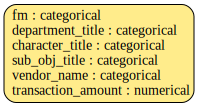

In [ ]:
metadata.visualize()

In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,fm,TVComplement,0.94266
1,department_title,TVComplement,0.76178
2,character_title,TVComplement,0.82012
3,sub_obj_title,TVComplement,0.73812
4,vendor_name,TVComplement,0.69005
5,transaction_amount,KSComplement,0.70156


In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [ ]:
import sdv

for col in num_attrs:
  quality_report = sdv.evaluation.single_table.evaluate_quality(train, synthetic_data, metadata)
  fig = sdv.evaluation.single_table.get_column_plot(
      real_data=train,
      synthetic_data=synthetic_data,
      metadata=metadata,
      column_name=col
  )

  fig.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 10.67it/s]|
Column Shapes Score: 77.57%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 20.87it/s]|
Column Pair Trends Score: 60.18%

Overall Score (Average): 68.87%



In [ ]:
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import RangeCoverage

for i in num_attrs:
    print(i +  " " +
    str(BoundaryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
       + ", RangeCoverage  " +
          str(RangeCoverage.compute(
              real_data=train[i],
        synthetic_data=synthetic_data[i]
          )) )

transaction_amount 1.0, RangeCoverage  0.0303550103227036


In [ ]:
from sdmetrics.single_column import CategoryAdherence
from sdmetrics.single_column import CategoryCoverage

for i in cat_attrs:
    print(i +  " CategoryAdherence" +
    str(CategoryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
    + ", CategoryCoverage : " + str(CategoryCoverage.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    )))


fm CategoryAdherence1.0, CategoryCoverage : 1.0
department_title CategoryAdherence1.0, CategoryCoverage : 1.0
character_title CategoryAdherence1.0, CategoryCoverage : 1.0
sub_obj_title CategoryAdherence1.0, CategoryCoverage : 1.0
vendor_name CategoryAdherence1.0, CategoryCoverage : 0.8554927500614402


In [ ]:
from sklearn.model_selection import train_test_split

#train_, test = train_test_split(train, test_size=0.3, random_state=42, stratify = train[cat_attrs])
test = data[cat_attrs+num_attrs].copy()
test['fm'] = test['fm'].astype(str)
test = test[~test.index.isin(train.index)]
for cat in cat_attrs:
    test = test[test[cat].isin(train[cat].unique())]
test = test.sample(n=30000, random_state=42)

In [ ]:
'''
Compute Utility Score
'''

from sdmetrics.single_table import  LinearRegression

test_synthetic = test.copy()
for cat in cat_attrs:
    test_synthetic = test_synthetic[test_synthetic[cat].isin(synthetic_data[cat].unique())]
missed_cat_penalty =  test_synthetic.shape[0]/test.shape[0]

synthetic_data_r2 = LinearRegression.compute(
    test_data=test_synthetic,
    train_data=synthetic_data,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

real_data_r2 = LinearRegression.compute(
    test_data=test,
    train_data=train,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

print(f'Utility Score: {min(synthetic_data_r2*missed_cat_penalty/real_data_r2 , 1)}')

Utility Score: 0.04373470242099058


In [ ]:
from sdmetrics.single_table import DCRBaselineProtection

privacy = DCRBaselineProtection.compute_breakdown(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    num_rows_subsample = 100,
    num_iterations =50
)
print(f'Privacy Score: {privacy["score"]}')

Privacy Score: 0.5370814385235314


In [ ]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3000
)

0.9846666666666667